<a href="https://colab.research.google.com/github/Josh-techie/AirBnB_clone/blob/master/Reviewing/Final_Exam_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> Final Exam : Applied Data science</h1></center>
<center><h3>Génie Informatique</h3></center>
<center><h3>09 juin 2023</h3></center>

---



## **Exercice I**
Les systèmes de détection d'intrusion (Intrusion Detection Systems IDS) et les systèmes de prévention d'intrusion (Intrusion Prevention Systems IPSs) sont les outils de défense les plus importants contre les attaques de réseau.
La problématique que vous allez aborder est celle de la détection d'intrusion.<br>
Votre objectif est de developper un systeme (basé sur les réseaux de neurones) de détection les comportements anormaux dans l'activité du réseau.<br>
les données sont fournis dans moodle.
1. Diviser les données en 80% données training et 20% testing.
2. Créer un modèle ANN qui prédit si la trame est une attaque ou non, le modéle doit contenir 4 couches: 3 couches cachées de 64,32,16 neurones -respectivement- et une couche de sortie.
3. utiliser comme algorithme d'optimization l'algorithme Adam.
4. utiliser 20 epoches pour entrainer le modele.
5. predire et afficher le resultat sur les données de test.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Chargement des données à partir du fichier CSV
dataset = pd.read_csv("flow_based_for_traning_full_normalized_all_featuers_CSV (1).csv")

# Extraction des caractéristiques (X) et des étiquettes (y)
X = dataset.iloc[:, 0:11].values
y = dataset.iloc[:, -1].values

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalisation des données
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Création du modèle ANN
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle avec l'algorithme d'optimisation Adam
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle avec 20 époques
model.fit(X_train, y_train, epochs=20, verbose=1)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Évaluation des performances du modèle
loss, acc = model.evaluate(X_test, y_test, verbose=1)

#resultat
print('Test Accuracy: %.3f' % acc)

# **Exercice II**

Le fichier **spacex_launch_data.csv** fournis dans moodle contient des informations de mission pour les lancements de fusées effectués par SpaceX  (Space Exploration Technologies Corp).

1. Charger les bibliothèques et la dataset que vous utiliserez dans l'exercice (pandas, numpy...) et lire le fichier spacex_launch_data.csv.

In [86]:
import numpy as np
import pandas as pd
import datetime

spaceX= pd.read_csv('SpaceX-Launch-Data.csv')

Have an overview about our dataser (Explore the dataset 💧)

In [87]:
spaceX.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
0,1,"June 4, 2010",18:45,F9 v1.0,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachutes)
1,2,"December 8, 2010",15:43,F9 v1.0,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO,NASA (COTS) NRO,Success,Failure (parachutes)
2,3,"May 22, 2012",7:44,F9 v1.0,CCAFS LC-40,Dragon demo flight C2+,525,LEO,NASA (COTS),Success,No attempt
3,4,"October 8, 2012",0:35,F9 v1.0,CCAFS LC-40,SpaceX CRS-1,500,LEO,NASA (CRS),Success,No attempt
4,5,"March 1, 2013",15:10,F9 v1.0,CCAFS LC-40,SpaceX CRS-2,677,LEO,NASA (CRS),Success,No attempt


In [88]:
spaceX.describe()

,Flight Number
count,48.00
mean,24.50
std,14.00
min,1.00
25%,12.75
50%,24.50
75%,36.25
max,48.00


In [89]:
spaceX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Flight Number      48 non-null     int64 
 1   Date               48 non-null     object
 2   Time (UTC)         48 non-null     object
 3   Booster Version    48 non-null     object
 4   Launch Site        48 non-null     object
 5   Payload            48 non-null     object
 6   Payload Mass (kg)  46 non-null     object
 7   Orbit              48 non-null     object
 8   Customer           48 non-null     object
 9   Mission Outcome    48 non-null     object
 10  Landing Outcome    48 non-null     object
dtypes: int64(1), object(10)
memory usage: 4.2+ KB


2. Afficher le nombre des cases vides de chaque colonne.

In [90]:
nombre_cases_vides = spaceX.isna().sum()
nombre_cases_vides

Flight Number        0
Date                 0
Time (UTC)           0
Booster Version      0
Launch Site          0
Payload              0
Payload Mass (kg)    2
Orbit                0
Customer             0
Mission Outcome      0
Landing Outcome      0
dtype: int64

In [91]:
# this is just for me been wondering
type(nombre_cases_vides)

pandas.core.series.Series

3. Convertire la colonne "***Date***" en type DateTime

In [92]:
# Before to be safe Remove leading and trailing spaces from the 'Date' column because I got some problem with row 37 dunno why 😪
# spaceX['Date'] = spaceX['Date'].str.strip()

# # Convert 'Date' column to datetime format with error handling
# spaceX['Date'] = pd.to_datetime(spaceX['Date'], format='%B %d, %Y', errors='coerce')
# spaceX['Date']
spaceX['Date'] = pd.to_datetime(spaceX['Date'], errors='coerce')

# there's still a problem in 37 dunno why 😪😪😪😪😪

# for the time I'm just gonna fill it with it's date manually  😁
spaceX['Date'] = spaceX['Date'].fillna(pd.Timestamp('20170625'))

#display
spaceX['Date']


0    2010-06-04
1    2010-12-08
2    2012-05-22
3    2012-10-08
4    2013-03-01
5    2013-09-29
6    2013-12-03
7    2014-01-06
8    2014-04-18
9    2014-07-14
10   2014-08-05
11   2014-09-07
12   2014-09-21
13   2015-01-10
14   2015-02-11
15   2015-03-02
16   2015-04-14
17   2015-04-27
18   2015-06-28
19   2015-12-22
20   2016-01-17
21   2016-03-04
22   2016-04-08
23   2016-05-06
24   2016-05-27
25   2016-06-15
26   2016-07-18
27   2016-08-14
28   2017-01-14
29   2017-02-19
30   2017-03-16
31   2017-03-30
32   2017-05-01
33   2017-05-15
34   2017-06-03
35   2017-06-23
36   2017-06-25
37   2017-06-25
38   2017-08-14
39   2017-08-24
40   2017-09-07
41   2017-10-09
42   2017-10-11
43   2017-10-30
44   2017-12-15
45   2017-12-23
46   2018-01-08
47   2018-01-31
Name: Date, dtype: datetime64[ns]

4. Extraire l'année de la colonne "***Date***" puis ajouter la dans une colonne séparée.

In [93]:
# df['Year'] = df['Date'].dt.year
spaceX['Year'] = spaceX['Date'].dt.year
spaceX['Year']

0     2010
1     2010
2     2012
3     2012
4     2013
5     2013
6     2013
7     2014
8     2014
9     2014
10    2014
11    2014
12    2014
13    2015
14    2015
15    2015
16    2015
17    2015
18    2015
19    2015
20    2016
21    2016
22    2016
23    2016
24    2016
25    2016
26    2016
27    2016
28    2017
29    2017
30    2017
31    2017
32    2017
33    2017
34    2017
35    2017
36    2017
37    2017
38    2017
39    2017
40    2017
41    2017
42    2017
43    2017
44    2017
45    2017
46    2018
47    2018
Name: Year, dtype: int32

5. Convertire la colonne "***Payload Mass (kg)***" en entier ((effectuez tout le nettoyage nécessaire des données avant la conversion))

In [94]:
# to have a look at the column to clean 🍂
spaceX['Payload Mass (kg)']

0            NaN
1            NaN
2           525 
3           500 
4           677 
5           500 
6         3,170 
7         3,325 
8         2,296 
9         1,316 
10        4,535 
11        4,428 
12        2,216 
13        2,395 
14          570 
15        4,159 
16        1,898 
17        4,707 
18        1,952 
19        2,034 
20          553 
21        5,271 
22        3,136 
23        4,696 
24        3,100 
25        3,600 
26        2,257 
27        4,600 
28        9,600 
29        2,490 
30        5,600 
31        5,300 
32    Classified
33        6,070 
34        2,708 
35        3,669 
36        9,600 
37        6,761 
38        3,310 
39          475 
40        4,990 
41        9,600 
42        5,200 
43        3,500 
44        2,205 
45        9,600 
46    Classified
47         4,230
Name: Payload Mass (kg), dtype: object

As you can see the column has some impureties and needs some cleaning like string in a column where you should only have integers!

In [96]:
# # Convert the column to string type
# spaceX['Payload Mass (kg)'] = spaceX['Payload Mass (kg)'].astype(str)

# # Remove any commas in the column and replace 'Classified' with -1 means that this value is classified or not provided !
# spaceX['Payload Mass (kg)'] = spaceX['Payload Mass (kg)'].str.replace(',', '').replace('Classified', -1)

# # Now do the same for missing values Replace nan values with -1

# # first Replace 'nan' with 'NaN' (standard representation for missing values)
# # spaceX['Payload Mass (kg)'] = spaceX['Payload Mass (kg)'].str.replace('nan', 'NaN')

# # then replace NaN with -1
# spaceX['Payload Mass (kg)'] = spaceX['Payload Mass (kg)'].fillna(-1)

# # Convert the column to numeric values (integers)
# spaceX['Payload Mass (kg)'] = spaceX['Payload Mass (kg)'].astype('int', errors='ignore')

# supprimer les virgules et les espaces
spaceX['Payload Mass (kg)'] = spaceX['Payload Mass (kg)'].str.replace(',', '').str.replace(' ', '')

# extraire les chiffres
spaceX['Payload Mass (kg)'] = spaceX['Payload Mass (kg)'].str.extract('(\d+)')

# Remplacer les valeurs NaN par 0
spaceX['Payload Mass (kg)'] = spaceX['Payload Mass (kg)'].fillna('0')


# Convertir les valeurs en entiers
spaceX['Payload Mass (kg)'] = spaceX['Payload Mass (kg)'].astype(int)

In [97]:
# as you can see it's cleaned casted values to int and every NaN or Classified is replace by 0
spaceX['Payload Mass (kg)']

0        0
1        0
2      525
3      500
4      677
5      500
6     3170
7     3325
8     2296
9     1316
10    4535
11    4428
12    2216
13    2395
14     570
15    4159
16    1898
17    4707
18    1952
19    2034
20     553
21    5271
22    3136
23    4696
24    3100
25    3600
26    2257
27    4600
28    9600
29    2490
30    5600
31    5300
32       0
33    6070
34    2708
35    3669
36    9600
37    6761
38    3310
39     475
40    4990
41    9600
42    5200
43    3500
44    2205
45    9600
46       0
47    4230
Name: Payload Mass (kg), dtype: int64

6. Creer un graphique qui affiche le nombre de vols par an.



In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# now I have column Year I only need to count how many flights per year manipulating the column Year I created previouslty

# Compter le nombre de vols par an en utilisant la colonne 'Year'
flights_per_year = spaceX['Year'].value_counts().sort_index().reset_index()
# you could see we succeeded now, we will just have to display the graph in a plot 🌟
type(flights_per_year)
flights_per_year

,Year,count
0,2010,2
1,2012,2
2,2013,3
3,2014,6
4,2015,7
5,2016,8
6,2017,18
7,2018,2


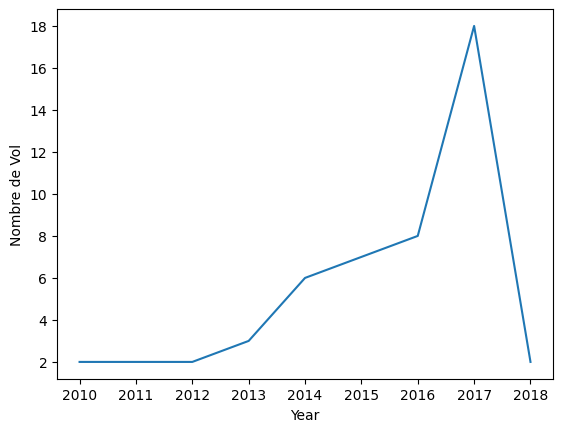

In [113]:
# buut if life was that easy, we wouldn't be here as engineers 😅
# convert flights_per_year into a dataframe with columns 'Year' and 'Nombre de vol'
flights_per_year.columns = ['Year', 'Nombre de Vol']

sns.lineplot(x= 'Year', y= 'Nombre de Vol', data=flights_per_year)
plt.show()

7. Créez un graphique linéaire qui montre comment le poids de la charge "***Payload Mass (kg)***" a évolué au fil du temps.

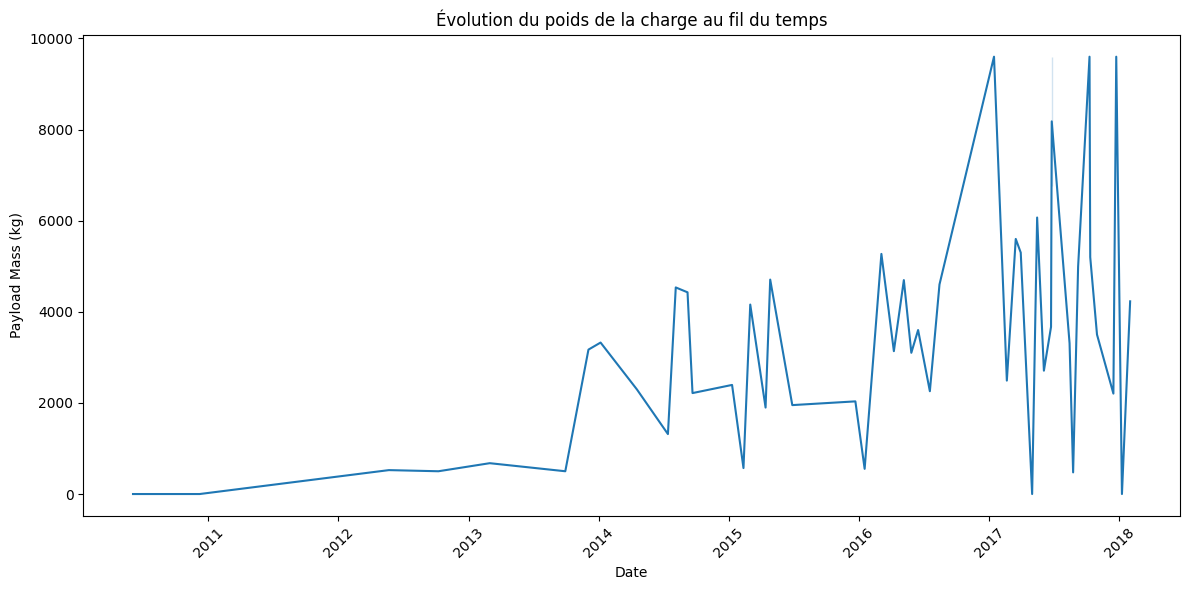

In [114]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Payload Mass (kg)', data=spaceX)
plt.xlabel('Date')
plt.ylabel('Payload Mass (kg)')
plt.title('Évolution du poids de la charge au fil du temps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Exercice III**

[www.triatek.com](https://www.triatek.com/)
est le site web de la société **Triatek** qui conçoit et fabrique des produits et des solutions de circulation d'air pour les établissements de santé, les laboratoires et les installations municipales. dans cet exercice, vous allez créer un robot qui va collecter et stocker tous les produits présentés sur le site.

1. Charger les bibliothèques et la dataset que vous utiliserez dans l'exercice (pandas, numpy...)

In [ ]:
import pandas as pd
import numpy as np
import requests
import json



2. Créer un robot qui collecte tous les produit afficher sur le site.

In [ ]:
page_to_scrape = requests.get("https://www.triatek.com/")

if page_to_scrape.status_code == 200:
  print('Request Successfull')
  print(page_to_scrape.text)
  data = page_to_scrape.json
else:
  print("Request Failed, with a status code", page_to_scrape.status_code)

Request Successfull



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js " lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8">
<script type="text/javascript" src="/ruxitagentjs_ICANVfqru_10289240325103055.js" data-dtconfig="rid=RID_2418|rpid=-1409152357|domain=triatek.com|reportUrl=/rb_bf13771zwc|app=ea7c4b59f27d43eb|cuc=7bpf7nsl|mel=100000|featureHash=ICANVfqru|dpvc=1|ssv=4|lastModification=1716770761011|tp=500,50,0|rdnt=1|uxrgce=1|bp=3|agentUri=/ruxitagentjs_ICANVfqru_10289240325103055.js"></script><script src="/scripts/js/vendor/jquery.js"></script>

	
<link href="/-/media/feature/experience-accelerator/bootstrap-4/bootstrap-4/styles/optimized-min.css?t=20200225T152148Z" rel="stylesheet"><link href="/-/media/base-themes/core-libraries/styles/optimized-min.css?

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page_to_scrape.text, "html.parser")

***Time to go find some product 🐼***

In [ ]:
# Find all elements with class name 'col-12 col-md-9'
elements = soup.find_all(class_="col-12 col-md-6")

# We found that our product are located in element[8], I don't wanna waste time but it should be better than this tbh

# don't to create an empty list of product where we will store the products!
products = []
li_elements = elements[8].find_all("li")
for li in li_elements:
    products.append(li.text.strip())

# print the list of the products
print("Products:", products)

Products: ['Room Controllers and Monitors', 'Central Monitoring Station', 'Room Sensors', 'Fume Hood Controllers and Monitors', 'Fume Hood Sensors', 'FlowSafe Stable Vortex Fume Hoods', 'Air Valves']


3. Stockez ces informations dans un Dataframe (pandas).

In [ ]:
products_df = pd.DataFrame(products, columns=['Product Title'])
products_df

,Product Title
0,Room Controllers and Monitors
1,Central Monitoring Station
2,Room Sensors
3,Fume Hood Controllers and Monitors
4,Fume Hood Sensors
5,FlowSafe Stable Vortex Fume Hoods
6,Air Valves


4. Enregitrez les Dataframes dans un fichier csv.

In [ ]:
products_df.to_csv('products.csv')